In [2]:
import pandas as pd
from pathlib import Path

from posydon.popsyn.binarypopulation import BinaryPopulation
from posydon.binary_evol.binarystar import BinaryStar
from posydon.binary_evol.singlestar import SingleStar
from posydon.popsyn.synthetic_population import Population
from posydon.popsyn.synthetic_population import PopulationRunner
import astropy.units as u

import os
import shutil
from posydon.config import PATH_TO_POSYDON
import pandas as pd 

from POSYDONHRDiagramModule import HR_Diagram

In [53]:
cols = ['time', 'step_names', 'state','S1_state', 'S2_state', 'orbital_period', 'event', 'S1_mass', 'S2_mass' ]
finCols = [
    'orbital_period_f',
    'eccentricity_f',
    'state_f',

    'S2_state_f',
    'S2_mass_f',
    'S2_log_R_f',

    'S1_state_f',
    'S1_mass_f',
    'S1_log_R_f'
 ]

initCols = [
    'orbital_period_i',
    'eccentricity_i',
    'state_i',

    'S2_state_i',
    'S2_mass_i',
    'S2_log_R_i',

    'S1_state_i',
    'S1_mass_i',
    'S1_log_R_i'
 ]

In [139]:
oldPop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_OldUCXB_subpop.h5')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [140]:
oldPopDF = oldPop.oneline.select()

In [4]:
oldUCXBData = pd.read_csv(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/InitResearch/UCXBs.csv')

In [5]:
oldUCXBData

100,000,000.0
100,000,000.0

(100, 0, 0.0)

In [6]:
loadedpop = Population(r'/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_UCXB_subpop.h5')

In [7]:
loadedpop.calculate_formation_channels()

Formation channels already exist in the parsed population file!
Channels will be overwriten


In [8]:
loadedpop.formation_channels

,channel_debug,channel
0,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
1,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
2,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
3,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
4,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
...,...,...
575,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
576,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
577,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END
578,ZAMS_oRLO1_CC1_oRLO2_oCE2_END,ZAMS_oRLO1_CC1_oRLO2_oCE2_END


In [9]:
loadedpop.formation_channels[loadedpop.formation_channels != 'ZAMS_oRLO1_CC1_oRLO2_oCE2_END'].dropna().index.to_list()

[39, 107, 130, 156, 221, 252, 290, 432, 434, 437, 494, 526, 568]

In [10]:
loadedpop.oneline[[39, 107, 130, 156, 221, 252, 290, 432, 434, 437, 494, 526, 568]][finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S1_state_f,S1_mass_f,S1_log_R_f
binary_index,,,,,,,,,
39,0.031946,0.0,initial_RLOF,stripped_He_non_burning,1.302401,-0.654915,NS,1.283958,-4.745687
107,0.000018,0.0,contact,NS,1.277584,-4.745687,WD,1.261091,-4.745687
130,0.000018,0.0,contact,NS,1.277584,-4.745687,WD,1.257418,-4.745687
156,0.000017,0.0,contact,NS,1.277584,-4.745687,WD,1.342922,-4.745687
221,0.000018,0.0,contact,NS,1.277584,-4.745687,WD,1.188183,-4.745687
252,0.000017,0.0,contact,NS,1.277584,-4.745687,WD,1.336957,-4.745687
290,0.036990,0.0,initial_RLOF,stripped_He_non_burning,1.088233,-0.699949,NS,1.287746,-4.745687
432,0.035383,0.0,initial_RLOF,stripped_He_non_burning,1.123201,-0.691328,NS,1.282977,-4.745687
434,0.000019,0.0,contact,NS,1.277584,-4.745687,WD,1.161731,-4.745687


In [11]:
weird_paths = [[39, 290, 432, 494]]

In [19]:
loadedpop.formation_channels.loc[[39, 290, 432, 494]]

# ZAMS_oRLO1_CC1_oRLO2_oCE2_END

,channel_debug,channel
39,ZAMS_CC1_oRLO2_oCE2_END,ZAMS_CC1_oRLO2_oCE2_END
290,ZAMS_CC1_oRLO2_oCE2_END,ZAMS_CC1_oRLO2_oCE2_END
432,ZAMS_CC1_oRLO2_oCE2_END,ZAMS_CC1_oRLO2_oCE2_END
494,ZAMS_CC1_oRLO2_oCE2_END,ZAMS_CC1_oRLO2_oCE2_END


In [13]:
UCXB_anypoint = Population('/home/bku2126/b1095/bku2126/UCXBInvestigation/Project/Analysis/1e+00_Zsun_UCXB_anypoint_subpop.h5')

In [93]:
UCXBHistory = UCXB_anypoint.history.select()

In [40]:
(120 * u.minute).to(u.day).value

0.08333333333333334

In [49]:
(1 * u.minute).to(u.day).value

0.0006944444444444445

In [113]:
UCXBHistory[((UCXBHistory['orbital_period'] < ((60 * u.minute).to(u.day).value)) & (UCXBHistory['orbital_period'] > ((1 * u.minute).to(u.day).value))) & (UCXBHistory['state'] == 'initial_RLOF') & (UCXBHistory['event'] == 'END')]

,state,event,time,orbital_period,eccentricity,rl_relative_overflow_1,rl_relative_overflow_2,lg_mtransfer_rate,mass_transfer_case,step_names,...,S2_surface_n14,S2_surface_o16,S2_surf_avg_omega,S2_surf_avg_omega_div_omega_crit,S2_spin,S2_conv_env_top_mass,S2_conv_env_bot_mass,S2_envelope_binding_energy,S2_total_mass_h1,S2_total_mass_he4
binary_index,,,,,,,,,,,,,,,,,,,,,
2,initial_RLOF,END,6.750412e+07,0.032198,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,initial_RLOF,END,6.420867e+07,0.040682,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,initial_RLOF,END,6.626993e+07,0.032443,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,initial_RLOF,END,4.863118e+07,0.034398,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,initial_RLOF,END,4.391797e+07,0.035741,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,initial_RLOF,END,6.660901e+07,0.037907,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7604,initial_RLOF,END,7.057322e+07,0.038162,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7610,initial_RLOF,END,4.984255e+07,0.038031,0.0,NaN,NaN,NaN,case_B1,step_end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
x = UCXBHistory[((UCXBHistory['orbital_period'] < ((60 * u.minute).to(u.day).value)) & (UCXBHistory['orbital_period'] > ((1 * u.minute).to(u.day).value))) & (UCXBHistory['state'] == 'initial_RLOF') & (UCXBHistory['event'] == 'END')]['orbital_period']

In [105]:
y = UCXBHistory[((UCXBHistory['orbital_period'] < ((60 * u.minute).to(u.day).value)) & (UCXBHistory['orbital_period'] > ((1 * u.minute).to(u.day).value))) & (UCXBHistory['state'] == 'initial_RLOF') & (UCXBHistory['event'] == 'END')]['time']

In [106]:
import matplotlib.pyplot as plt

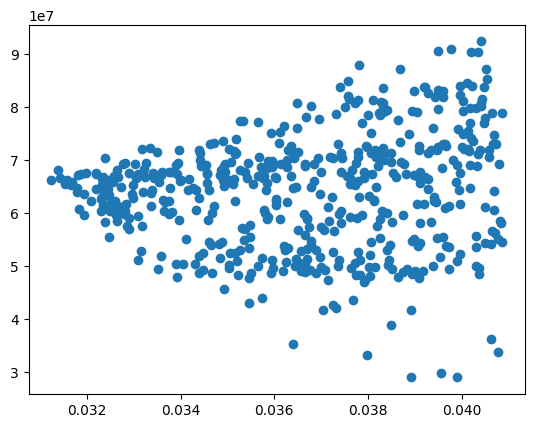

In [110]:
plt.scatter(x,y)

In [114]:
UCXB_DF = loadedpop.oneline.select()

In [125]:
UCXB_DF[finCols]

,orbital_period_f,eccentricity_f,state_f,S2_state_f,S2_mass_f,S2_log_R_f,S1_state_f,S1_mass_f,S1_log_R_f
binary_index,,,,,,,,,
0,0.032198,0.0,initial_RLOF,stripped_He_non_burning,1.202888,-0.674162,NS,1.266207,-4.745687
1,0.040682,0.0,initial_RLOF,stripped_He_non_burning,1.285015,-0.666262,NS,1.264298,-4.745687
2,0.051462,0.0,initial_RLOF,stripped_He_non_burning,2.607783,-0.431226,BH,2.775623,-4.928765
3,0.032443,0.0,initial_RLOF,stripped_He_non_burning,1.222433,-0.668492,NS,1.298593,-4.745687
4,0.034398,0.0,initial_RLOF,stripped_He_non_burning,1.778568,-0.584784,NS,1.285577,-4.745687
...,...,...,...,...,...,...,...,...,...
575,0.037907,0.0,initial_RLOF,stripped_He_non_burning,1.215948,-0.675860,NS,1.286555,-4.745687
576,0.038162,0.0,initial_RLOF,stripped_He_non_burning,1.145588,-0.690865,NS,1.264299,-4.745687
577,0.038031,0.0,initial_RLOF,stripped_He_non_burning,1.807839,-0.583320,NS,1.286629,-4.745687


In [120]:
import numpy as np

In [126]:
x = np.log10(UCXB_DF['orbital_period_i'])
y = UCXB_DF['orbital_period_f']

# plt.scatter(x,y)

In [157]:
def scatter(xname,yname, old = False):
    if old == True:
        x = (oldPopDF[xname])
        y = (oldPopDF[yname])
    else:
        x = (UCXB_DF[xname])
        y = (UCXB_DF[yname])
    plt.scatter(x,y)

<Axes: >

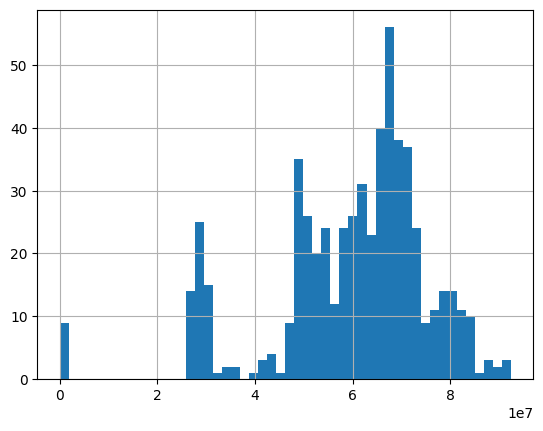

In [179]:
UCXB_DF['time_f'].hist(bins=50)

In [172]:
oldPopDF[finCols].describe()

,orbital_period_f,eccentricity_f,S2_mass_f,S2_log_R_f,S1_mass_f,S1_log_R_f
count,414.000000,414.0,414.000000,414.000000,414.000000,414.000000
mean,0.037694,0.0,0.854189,-0.838528,1.295899,-4.745687
std,0.009268,0.0,0.155229,0.421058,0.098702,0.000000
min,0.007339,0.0,0.516925,-2.295000,1.196033,-4.745687
25%,0.034625,0.0,0.795866,-0.732627,1.196033,-4.745687
50%,0.039589,0.0,0.894513,-0.676084,1.275613,-4.745687
75%,0.043725,0.0,0.996863,-0.652199,1.366403,-4.745687
max,0.050986,0.0,1.006803,-0.633801,1.652616,-4.745687


In [173]:
UCXB_DF[finCols].describe()

,orbital_period_f,eccentricity_f,S2_mass_f,S2_log_R_f,S1_mass_f,S1_log_R_f
count,580.000000,580.0,580.000000,580.000000,580.000000,580.000000
mean,0.037812,0.0,1.452263,-0.703422,1.387686,-4.750988
std,0.007738,0.0,0.463261,0.513487,0.353542,0.106500
min,0.000017,0.0,0.851001,-4.745687,1.048866,-4.945266
25%,0.034874,0.0,1.128964,-0.693608,1.268046,-4.745687
50%,0.037365,0.0,1.285073,-0.660080,1.277901,-4.745687
75%,0.039489,0.0,1.664697,-0.601085,1.294584,-4.745687
max,0.065352,0.0,2.842670,-0.408313,2.944287,-2.387105


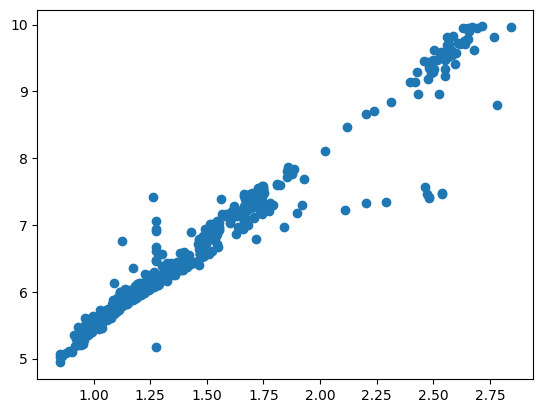

In [178]:
scatter('S2_mass_f', 'S2_mass_i', old=False)

(array([  1.,   2.,   2.,  21.,   6.,  37., 351.,  37.,   6.,   5.,   6.,
          9.,   3.,   3.,   4.,   5.,   4.,   3.,   2.,   3.,   2.,   4.,
          2.,   3.,   0.,   1.,   4.,   2.,   0.,   1.,   2.,   3.,   1.,
          1.,   1.,   0.,   0.,   1.,   3.,   4.,   0.,   3.,   1.,   0.,
          1.,   0.,   4.,   6.,  11.,   9.]),
 array([ 6.06123591,  6.33883731,  6.6164387 ,  6.8940401 ,  7.1716415 ,
         7.44924289,  7.72684429,  8.00444568,  8.28204708,  8.55964848,
         8.83724987,  9.11485127,  9.39245266,  9.67005406,  9.94765546,
        10.22525685, 10.50285825, 10.78045964, 11.05806104, 11.33566244,
        11.61326383, 11.89086523, 12.16846662, 12.44606802, 12.72366942,
        13.00127081, 13.27887221, 13.5564736 , 13.834075  , 14.1116764 ,
        14.38927779, 14.66687919, 14.94448058, 15.22208198, 15.49968338,
        15.77728477, 16.05488617, 16.33248757, 16.61008896, 16.88769036,
        17.16529175, 17.44289315, 17.72049455, 17.99809594, 18.27569734,
 

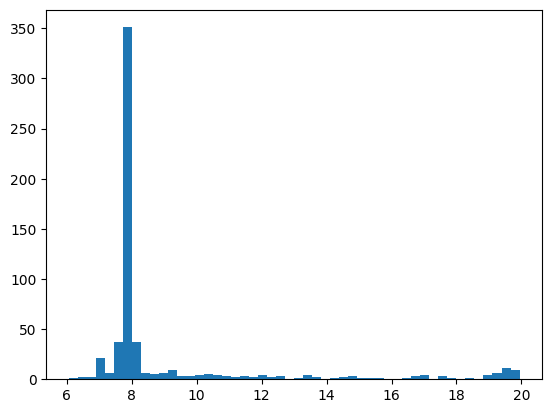

In [148]:
plt.hist(UCXB_DF['S1_mass_i'], bins = 50)

(array([ 2.,  6.,  7.,  9., 17., 20., 14., 23., 38., 40., 46., 45., 19.,
        26., 25., 17., 16.,  9., 11., 16., 12., 12., 20., 19., 21., 17.,
         6.,  2.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,
         2.,  0.,  2.,  2.,  6.,  5.,  8.,  7.,  7.,  5., 10.]),
 array([4.9417848 , 5.04239395, 5.1430031 , 5.24361225, 5.34422139,
        5.44483054, 5.54543969, 5.64604884, 5.74665799, 5.84726714,
        5.94787629, 6.04848544, 6.14909459, 6.24970373, 6.35031288,
        6.45092203, 6.55153118, 6.65214033, 6.75274948, 6.85335863,
        6.95396778, 7.05457692, 7.15518607, 7.25579522, 7.35640437,
        7.45701352, 7.55762267, 7.65823182, 7.75884097, 7.85945012,
        7.96005926, 8.06066841, 8.16127756, 8.26188671, 8.36249586,
        8.46310501, 8.56371416, 8.66432331, 8.76493245, 8.8655416 ,
        8.96615075, 9.0667599 , 9.16736905, 9.2679782 , 9.36858735,
        9.4691965 , 9.56980565, 9.67041479, 9.77102394, 9.87163309,
        9.97224224]),
 <BarContainer

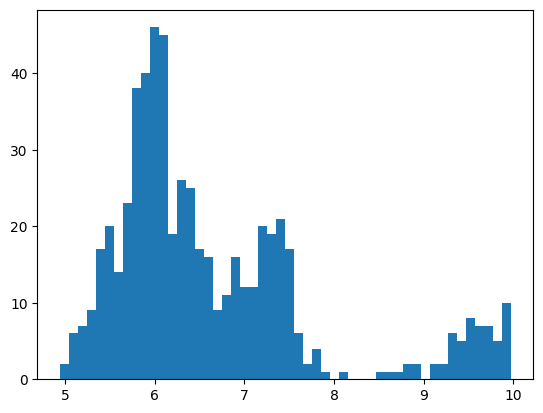

In [177]:
plt.hist(UCXB_DF['S2_mass_i'], bins = 50)

(array([ 6.,  5., 22., 24., 12., 17., 61., 35., 38., 35., 40., 14., 19.,
        20., 13., 23.,  9., 22.,  6.,  7., 29., 15., 23.,  3.,  4.,  6.,
         2.,  1.,  0.,  1.,  0.,  2.,  0.,  2.,  1.,  0.,  2.,  0.,  1.,
         3.,  9.,  6., 13., 10.,  5.,  9.,  2.,  0.,  2.,  1.]),
 array([0.85100136, 0.89083474, 0.93066811, 0.97050149, 1.01033486,
        1.05016824, 1.09000161, 1.12983499, 1.16966837, 1.20950174,
        1.24933512, 1.28916849, 1.32900187, 1.36883525, 1.40866862,
        1.448502  , 1.48833537, 1.52816875, 1.56800212, 1.6078355 ,
        1.64766888, 1.68750225, 1.72733563, 1.767169  , 1.80700238,
        1.84683576, 1.88666913, 1.92650251, 1.96633588, 2.00616926,
        2.04600263, 2.08583601, 2.12566939, 2.16550276, 2.20533614,
        2.24516951, 2.28500289, 2.32483627, 2.36466964, 2.40450302,
        2.44433639, 2.48416977, 2.52400314, 2.56383652, 2.6036699 ,
        2.64350327, 2.68333665, 2.72317002, 2.7630034 , 2.80283677,
        2.84267015]),
 <BarContainer

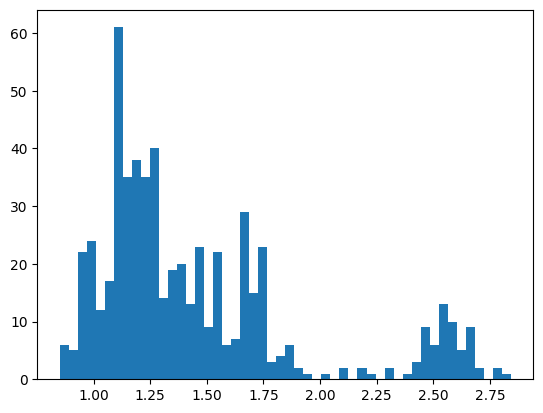

In [135]:
plt.hist(UCXB_DF['S2_mass_f'], bins = 50)

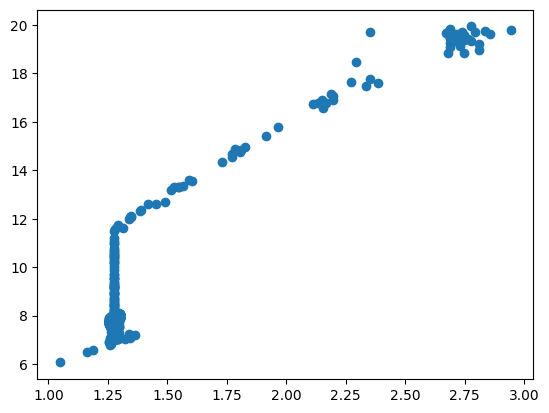

In [132]:
scatter('S1_mass_f', 'S1_mass_i')